#               Prediction of Diabetes Using Machine Learning Algorithms 

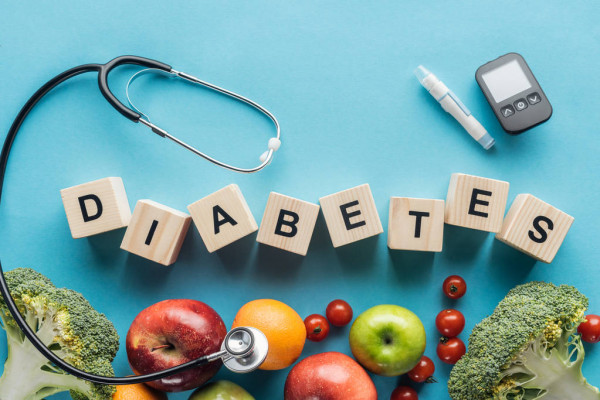

# About Dataset

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of  the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Variable Description  
Pregnancies: Number of times pregnant <br>
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test <br>
BloodPressure: Diastolic blood pressure (mm Hg)<br>
SkinThickness: Triceps skin fold thickness (mm)<br>
Insulin: 2-Hour serum insulin (mu U/ml)<br>
BMI: Body mass index (weight in kg/(height in m)^2)<br>
PedigreeFunction: Diabetes pedigree function-A function that scores likelihood of diabetes based on family history.<br>
Age: Age in years<br>
Outcome: Class variable (0 or 1) 268 of 768 are 1(1: the person is diabetic), the others are 0(0: the person is not diabetic).

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv') 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploratory Data Analysis

In [3]:
data.size

6912

In [4]:
display("Shape of dataset")
print("Rows:",data.shape[0],"\nColumns:",data.shape[1])

'Shape of dataset'

Rows: 768 
Columns: 9


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [9]:
data.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking if there are any missing values 

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## Correlation

In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Correlation Matrix 

<AxesSubplot:>

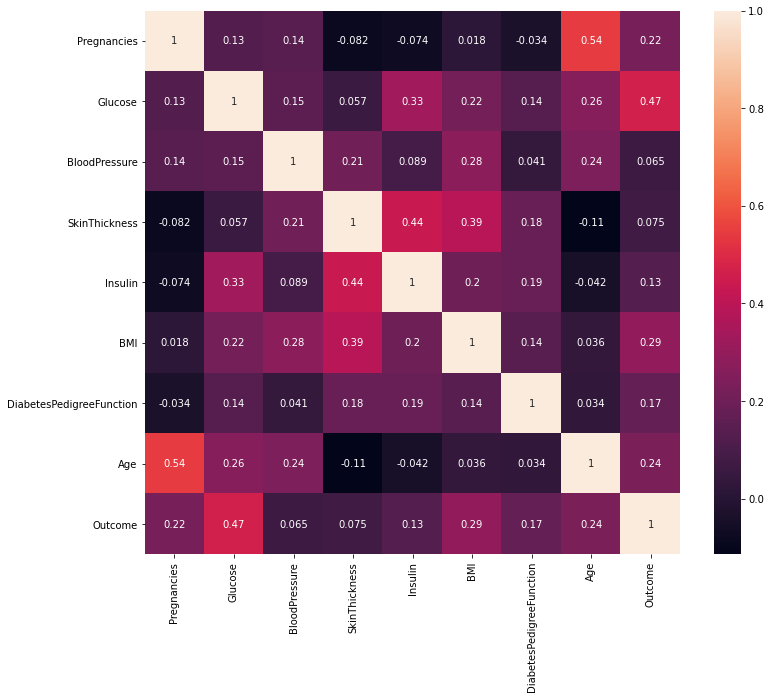

In [14]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

Age and pregnancies have strong correlation of about 0.54<br>
Outcome and glucose have a pretty good correlation of 0.47<br>
Insulin and skin thickness have a strong correlation of 0.44

# Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

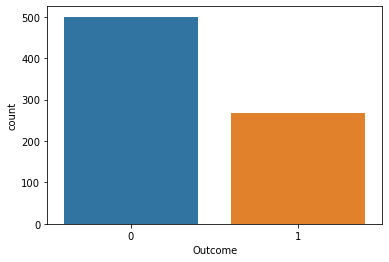

In [15]:
sns.countplot(data['Outcome'])

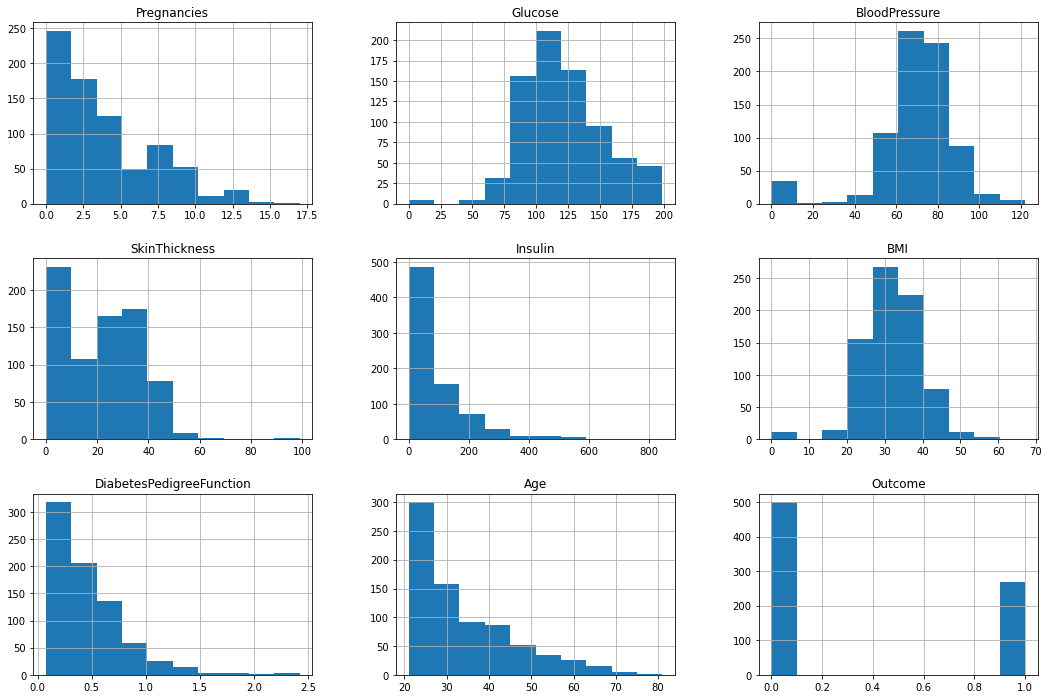

In [16]:
data.hist(figsize=(18,12))
plt.show()

<AxesSubplot:xlabel='SkinThickness'>

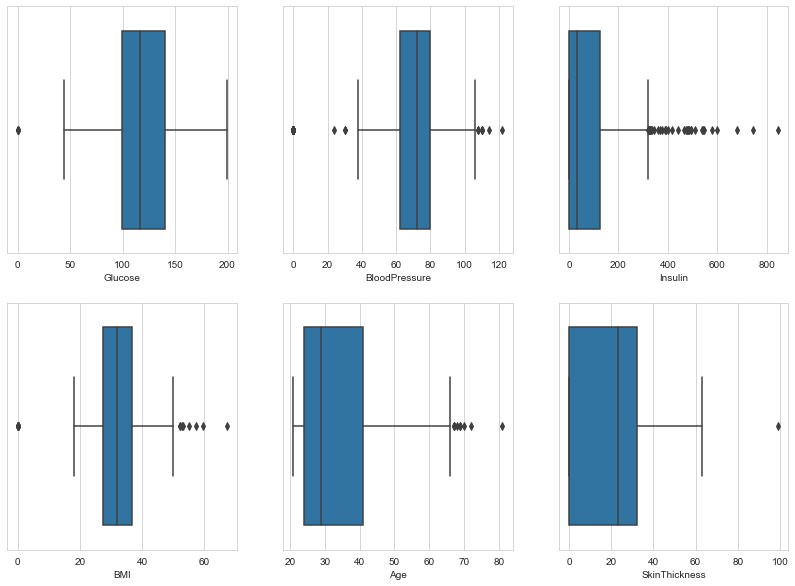

In [17]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

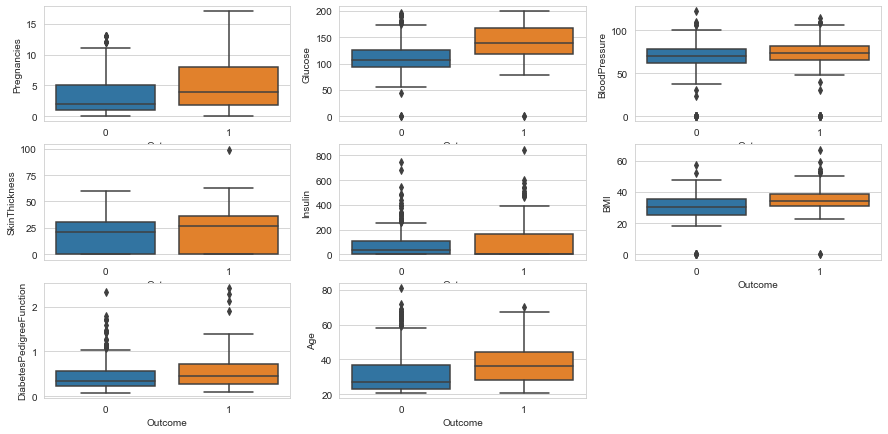

In [18]:
plt.figure(figsize=(15,25))
plt.subplot(10,3,1)
sns.boxplot(x='Outcome',y='Pregnancies', data=data)
plt.subplot(10,3,2)
sns.boxplot(x='Outcome',y='Glucose', data=data)
plt.subplot(10,3,3)
sns.boxplot(x='Outcome',y='BloodPressure', data=data)
plt.subplot(10,3,4)
sns.boxplot(x='Outcome',y='SkinThickness', data=data)
plt.subplot(10,3,5)
sns.boxplot(x='Outcome',y='Insulin', data=data)
plt.subplot(10,3,6)
sns.boxplot(x='Outcome',y='BMI', data=data)
plt.subplot(10,3,7)
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction', data=data)
plt.subplot(10,3,8)
sns.boxplot(x='Outcome',y='Age', data=data)
plt.show()

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

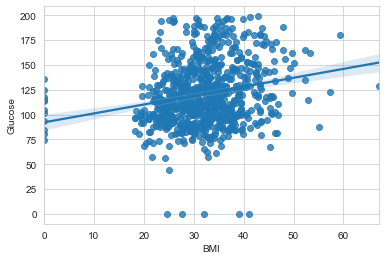

In [19]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

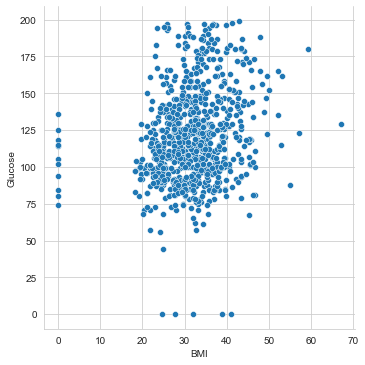

In [20]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

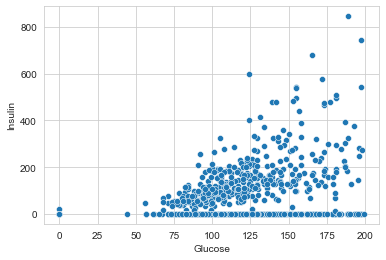

In [21]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

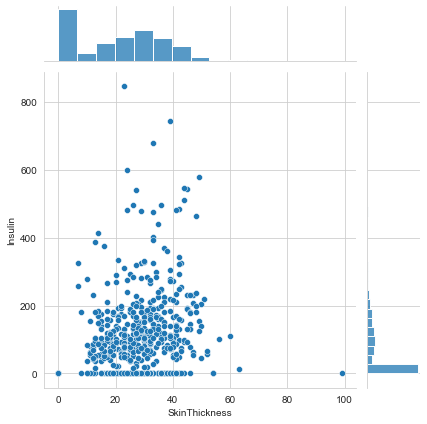

In [22]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

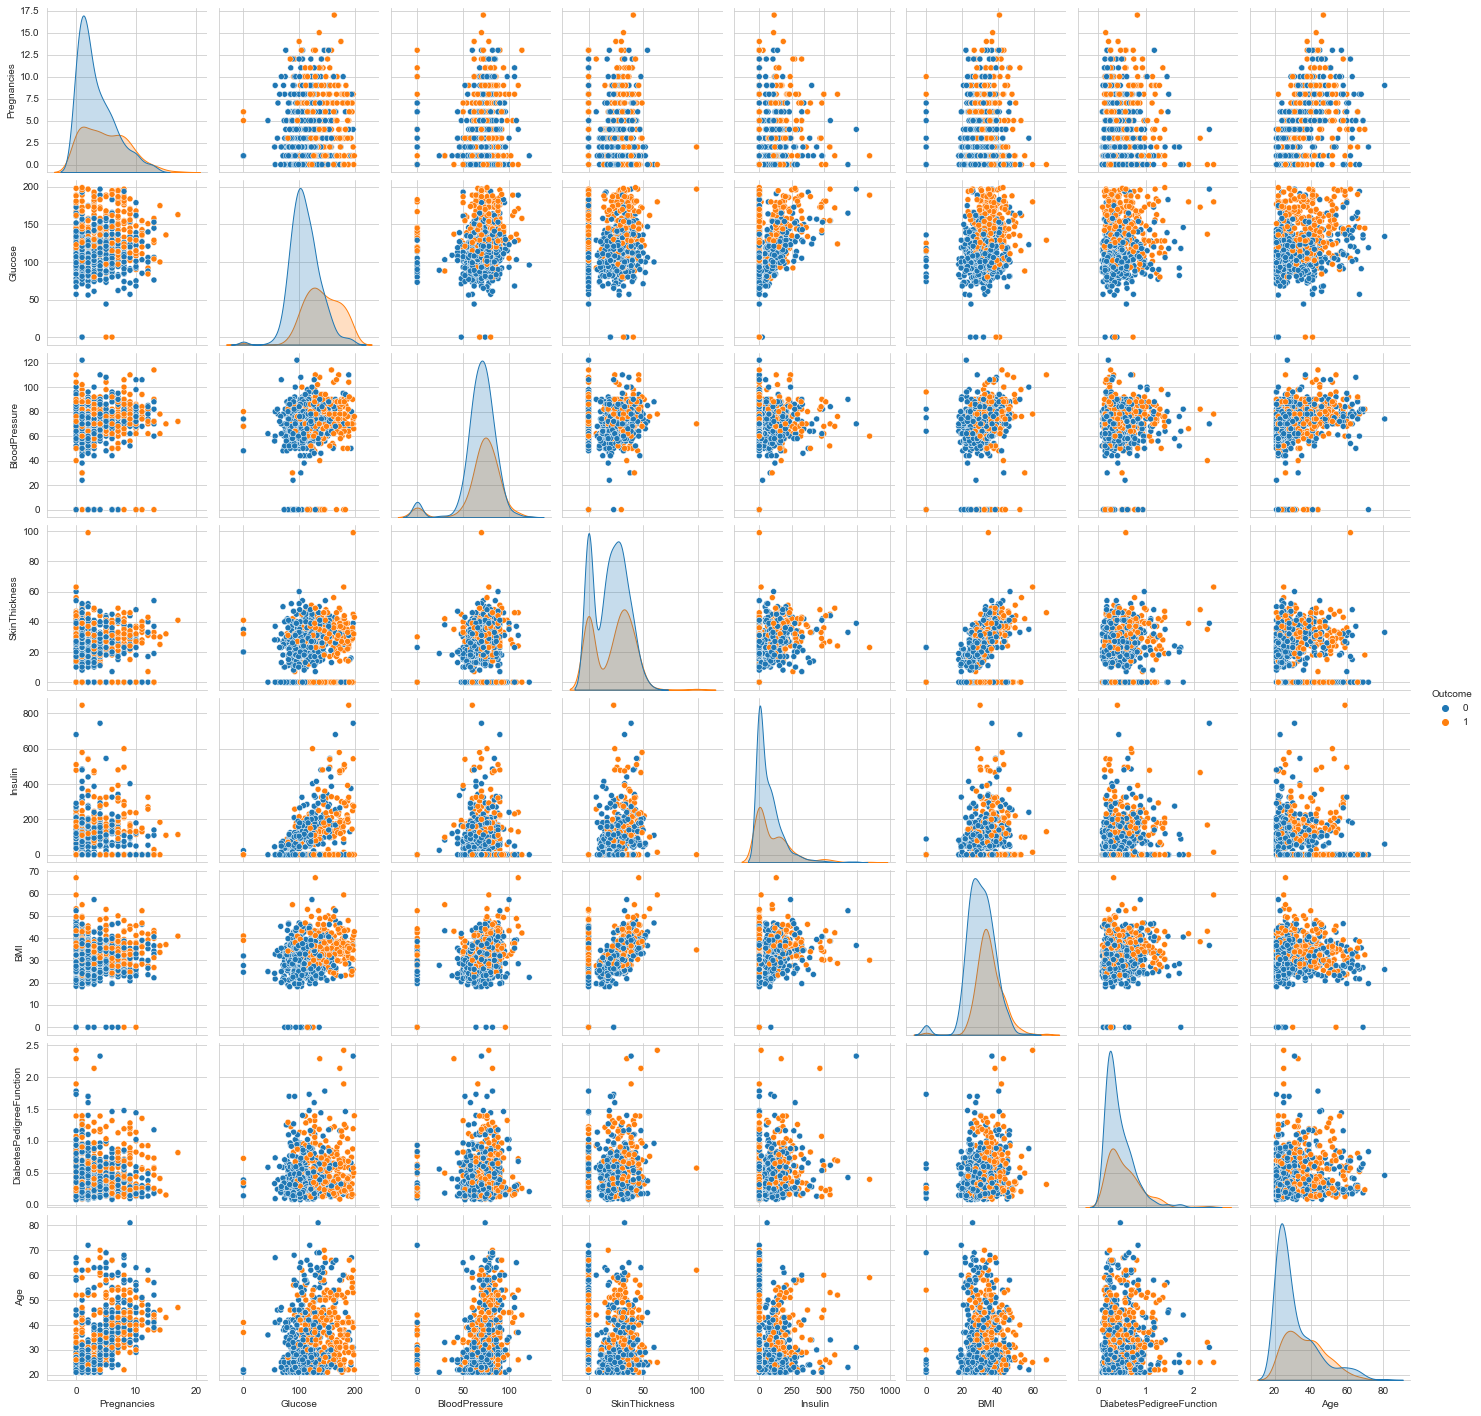

In [23]:
sns.pairplot(data,hue='Outcome')
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

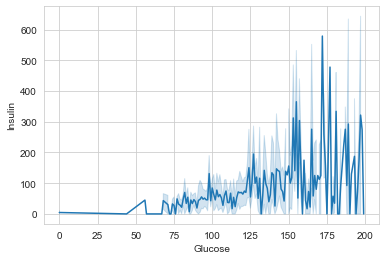

In [24]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

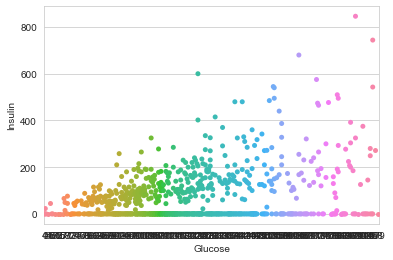

In [25]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=data)

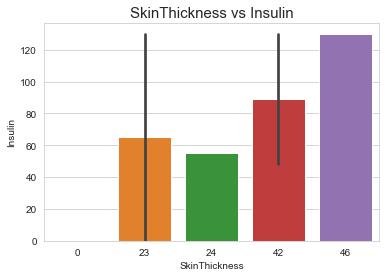

In [26]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

## Extracting independent(features) and dependent(lables) variables

In [27]:
x = data.drop(columns = 'Outcome')
y = data['Outcome']
print(x.shape, y.shape)

(768, 8) (768,)


In [28]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [29]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Splitting Dataset into training set and test set using Scikit-Learn

In [30]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [31]:
x_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38


In [32]:
x_test.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [33]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [34]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

# MACHINE LEARNING ALGORITHMS

## 1.Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train) 

LogisticRegression()

In [36]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Training Score:
 77.19869706840392
Mean Squared Error:
 0.17532467532467533
R2 score is:
 0.1731954662954862


Text(34.0, 0.5, 'Truth')

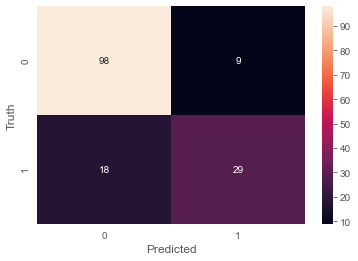

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
accuracy_lr=round(accuracy_score(y_test,y_pred)* 100, 2)
print(accuracy_lr)

82.47


## 2.K-Nearest Neighbours

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154

Training Score:
 78.17589576547232
Mean Squared Error:
 0.24025974025974026
R2 score is:
 -0.13302843507655582


Text(34.0, 0.5, 'Truth')

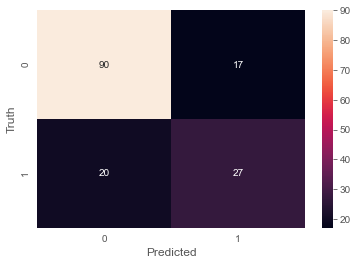

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
accuracy_knn=round(accuracy_score(y_test,y_pred)* 100, 2)
print(accuracy_knn)

75.97


## 3.Support Vector Machine

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [44]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Training Score:
 75.8957654723127
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


Text(34.0, 0.5, 'Truth')

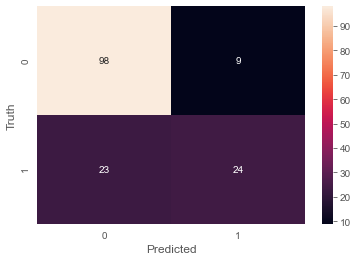

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
accuracy_svc=round(accuracy_score(y_test,y_pred)* 100, 2)
print(accuracy_svc)

79.22


## 4.Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [48]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Training Score:
 75.7328990228013
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


Text(34.0, 0.5, 'Truth')

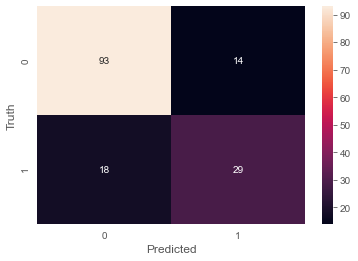

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
accuracy_gnb=round(accuracy_score(y_test,y_pred)* 100, 2)
print(accuracy_gnb)

79.22


## 5.Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [52]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154

Training Score:
 82.08469055374593
Mean Squared Error:
 0.2662337662337662
R2 score is:
 -0.2555179956253728


Text(34.0, 0.5, 'Truth')

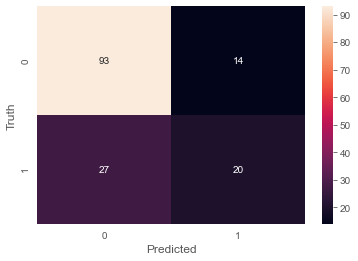

In [53]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
accuracy_dtree=round(accuracy_score(y_test,y_pred)* 100, 2)
print(accuracy_dtree)

73.38


## 6.Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154

Training Score:
 100.0
Mean Squared Error:
 0.17532467532467533
R2 score is:
 0.1731954662954862


Text(34.0, 0.5, 'Truth')

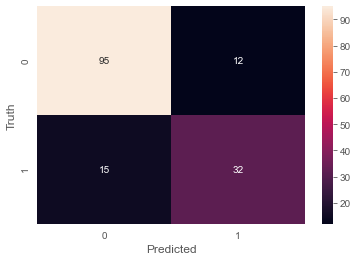

In [57]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
accuracy_rfc=round(accuracy_score(y_test,y_pred)* 100, 2)
print(accuracy_rfc)

82.47


## Accuracy Comparison

In [59]:
results = pd.DataFrame({
    'Model': ['Logistic Regression',
              'KNN',
              'Support Vector Machine',
              'Naive Bayes',
              'Decision Tree',
              'Random Forest'],
     "Accuracy_score":[accuracy_lr,
                      accuracy_knn,
                      accuracy_svc,
                      accuracy_gnb,
                       accuracy_dtree,
                       accuracy_rfc]})

result_df=results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Accuracy_score
0,Logistic Regression,82.47
1,Random Forest,82.47
2,Support Vector Machine,79.22
3,Naive Bayes,79.22
4,KNN,75.97
5,Decision Tree,73.38


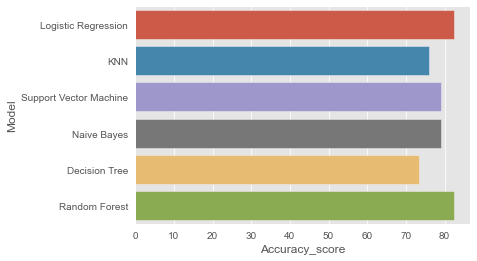

In [60]:
sns.barplot(x = results['Accuracy_score'], y = results['Model']);

## Making a prediction

In [61]:
df = np.array([[0,137,40,35,168,43.1,2.288,33]])
prediction = reg.predict(df)
print(prediction)

[1]


In [62]:
df = np.array([[11,143,94,33,146,36.6,0.254,51]])
prediction = svc.predict(df)
print(prediction)

[1]


In [63]:
df = np.array([[4,110,92,0,0,37.6,0.191,30]])
prediction = rfc.predict(df)
print(prediction)

[0]


In [64]:
df = np.array([[5,147,75,0,0,29.9,0.434,28]])
prediction = gnb.predict(df)
print(prediction)

[0]


In [65]:
df = np.array([[13,106,70,0,0,34.2,0.251,52]])
prediction =knn.predict(df)
print(prediction)

[0]


In [66]:
df = np.array([[1,126,60,0,0,30.1,0.349,47]])
prediction = dtree.predict(df)
print(prediction)

[1]


# Conclusion
Logistic Regression and random forest gives highest accuracy of 82.47% for predicting diabetes.